In [161]:
%load_ext autoreload
%autoreload 2

import model

import numpy as np, pandas as pd

import matplotlib
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


population                                 ... cured                      \
          P0  P1  P2 P3 P4  P5 P6 P7  P8 P9  ...   P90 P91 P92 P93 P94 P95   
0         12  10   9  8  5  13  5  7  19  6  ...     0   0   0   0   0   0   
1          7  10   9  7  4  16  5  6  15  5  ...     0   0   0   0   0   0   
2          7  10   9  2  3  16  6  4  15  6  ...     0   0   0   0   0   0   
3          6   9  12  1  3  16  6  1  17  4  ...     0   0   0   0   0   0   
4          6   9  15  1  3  16  5  2  21  4  ...     0   0   0   0   0   0   

                   
  P96 P97 P98 P99  
0   0   0   0   0  
1   0   0   0   0  
2   0   0   0   0  
3   0   0   0   0  
4   0   0   0   0  

[5 rows x 500 columns]

,cured,immune,infected,population,susceptible
0,0,1,1,1000,999
1,0,18,18,1000,982
2,0,26,26,1000,974
3,0,179,179,999,820
4,0,497,497,992,495


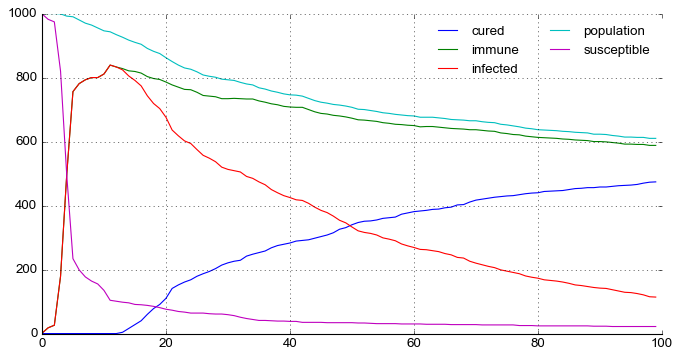

In [212]:
world = model.World(randomize=True)

populations = {}
for i in range(100):
    world.evolve()
    
    s = world.census()
    populations[i] = s

populations = pd.concat(populations)

df = populations.copy()
df= df.stack().unstack(1).unstack(1)

agg = df.stack(0).sum(axis=1).unstack()

display(df.head())
display(agg.head())

plt.style.use('classic')
plt.rc('font', **{'family': 'Arial', 'weight': 'normal', 'size': 12})

fig = plt.figure(figsize=(10,5))
fig.patch.set_facecolor('white')

ax = fig.add_subplot(1, 1, 1)

ax.spines['left'].set_visible(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.grid(True,axis='both',linestyle=':')

for c in agg.columns:
    ax.plot(agg[c])

ax.legend(loc='best', fontsize=12, frameon=False, ncol=2)
plt.show()